# WeatherPy

### Analysis

* __Observed Trend 1__: Although cities at Equator do not have the highest temperature.  Although, their temperatures remain high (around 80 F-Degree).  North had more data when approaching the polar.  Few cities/countries existed passing the Antarctic Cirlcle (60ish degree).From the trend of "City Latitude vs. Max Temperature  graph, the temperature incureased from both sides to the Equator.
* __Observed Trend 2__: From graph "City Latitude vs Humidity , humidities varies among cities even at the same Latitude. There are more than just latitude affecting the humidity (i.e. geographic location). We see that the humidity among cities around equator have a moderate-to-high-humidity (40%-100%). This could be due to the hot temperatures close to the equator.  
* __Observed Trend 3__: From graph "City Latitude vs Wind Speed", The wind speeds for cities around Equator below 20mph. The temperature  is one of the many factors affecting the Wind Speed. 

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import random
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#Import API Key for  
from config import key

## Generate Cities List

In [2]:
#Latitudes range from -90 to 90.
#Longitudes range from -180 to 180.
# randomly select samples (1000) for Lat and Lon
# We can remove duplicates and randomly select another 500 sample from it
LatRand = np.random.choice(range(-90,90),15000)
LonRand = np.random.choice(range(-180,180),15000)

LatLon = pd.DataFrame({"Latitude":LatRand,"Longitude":LonRand})        
LatLon.head()

,Latitude,Longitude
0,19,-108
1,-70,-169
2,-67,-70
3,85,-77
4,2,-62


In [3]:
# use citipy to associate with nearest city.

LatLon["Closest City name"] = ""
LatLon["Closest Country code"] = ""
for index,row in LatLon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    LatLon.set_value(index,"Closest City name",city.city_name)
    LatLon.set_value(index,"Closest Country code",city.country_code.upper())

C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [4]:
# At least 500 unique (non-repeat) cities 

# Remove any duplicate cities

ULatLon = LatLon.dropna()
ULatLon = ULatLon.drop_duplicates()

# Picking a sample of 600 cities to proceed with analysis
SampCities = ULatLon.sample(600)
SampCities =SampCities.reset_index()
SampCities = SampCities.iloc[:,[3,4]]
SampCities.head()

,Closest City name,Closest Country code
0,pindi gheb,PK
1,mincivan,AZ
2,kodiak,US
3,lazaro cardenas,MX
4,hasaki,JP


## Perform API Calls

In [5]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :key,"units":"imperial" }

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

# loop throught the Cities and append them to a dataframe
for index,row in SampCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SampCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()

    SampCities.set_value(index,"Latitude",CWRespJson.get("coord",{}).get("lat"))
    SampCities.set_value(index,"Longitude",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Temperature",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Max Temp",CWRespJson.get("main",{}).get("temp_max"))
    SampCities.set_value(index,"Wind speed",CWRespJson.get("wind",{}).get("speed"))
    SampCities.set_value(index,"Humidity",CWRespJson.get("main",{}).get("humidity"))
    SampCities.set_value(index,"Cloudiness",CWRespJson.get("clouds",{}).get("all"))
    SampCities.set_value(index,"Date",CWRespJson.get("dt"))


print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 600 | for City,Country: pindi gheb,PK
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=pindi+gheb%2CPK
Processing Record 2 of 600 | for City,Country: mincivan,AZ


C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future rele

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=mincivan%2CAZ
Processing Record 3 of 600 | for City,Country: kodiak,US
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=kodiak%2CUS
Processing Record 4 of 600 | for City,Country: lazaro cardenas,MX
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=lazaro+cardenas%2CMX
Processing Record 5 of 600 | for City,Country: hasaki,JP
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=hasaki%2CJP
Processing Record 6 of 600 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=port+alfred%2CZA
Processing Record 7 of 600 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=p

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=mount+isa%2CAU
Processing Record 49 of 600 | for City,Country: new norfolk,AU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=new+norfolk%2CAU
Processing Record 50 of 600 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=cape+town%2CZA
Processing Record 51 of 600 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=cape+town%2CZA
Processing Record 52 of 600 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=cape+town%2CZA
Processing Record 53 of 600 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=mandalgovi%2CMN
Processing Record 96 of 600 | for City,Country: vestmannaeyjar,IS
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=vestmannaeyjar%2CIS
Processing Record 97 of 600 | for City,Country: belushya guba,RU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=belushya+guba%2CRU
Processing Record 98 of 600 | for City,Country: bambous virieux,MU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=bambous+virieux%2CMU
Processing Record 99 of 600 | for City,Country: arraial do cabo,BR
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=arraial+do+cabo%2CBR
Processing Record 100 of 600 | for City,Country: ribeira grande,PT
http://api.openweathermap.org/data/2.5/weather?appid=972

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=biu%2CNG
Processing Record 142 of 600 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=ushuaia%2CAR
Processing Record 143 of 600 | for City,Country: torbay,CA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=torbay%2CCA
Processing Record 144 of 600 | for City,Country: saint george,BM
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=saint+george%2CBM
Processing Record 145 of 600 | for City,Country: tsihombe,MG
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=tsihombe%2CMG
Processing Record 146 of 600 | for City,Country: georgetown,SH
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=georgeto

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=ushuaia%2CAR
Processing Record 190 of 600 | for City,Country: bubaque,GW
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=bubaque%2CGW
Processing Record 191 of 600 | for City,Country: ribeira grande,PT
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=ribeira+grande%2CPT
Processing Record 192 of 600 | for City,Country: bluff,NZ
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=bluff%2CNZ
Processing Record 193 of 600 | for City,Country: bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=bredasdorp%2CZA
Processing Record 194 of 600 | for City,Country: ponta do sol,PT
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperia

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=lagoa%2CPT
Processing Record 237 of 600 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=rikitea%2CPF
Processing Record 238 of 600 | for City,Country: airai,PW
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=airai%2CPW
Processing Record 239 of 600 | for City,Country: akureyri,IS
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=akureyri%2CIS
Processing Record 240 of 600 | for City,Country: cagayan de tawi-tawi,PH
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=cagayan+de+tawi-tawi%2CPH
Processing Record 241 of 600 | for City,Country: saskylakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=impe

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=itarema%2CBR
Processing Record 283 of 600 | for City,Country: bambous virieux,MU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=bambous+virieux%2CMU
Processing Record 284 of 600 | for City,Country: surgut,RU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=surgut%2CRU
Processing Record 285 of 600 | for City,Country: cherskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=cherskiy%2CRU
Processing Record 286 of 600 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=ushuaia%2CAR
Processing Record 287 of 600 | for City,Country: kalmunai,LK
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=wloszczowa%2CPL
Processing Record 330 of 600 | for City,Country: ponta do sol,CV
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=ponta+do+sol%2CCV
Processing Record 331 of 600 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=rikitea%2CPF
Processing Record 332 of 600 | for City,Country: ponta do sol,CV
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=ponta+do+sol%2CCV
Processing Record 333 of 600 | for City,Country: port lincoln,AU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=port+lincoln%2CAU
Processing Record 334 of 600 | for City,Country: sitka,US
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&uni

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=lebu%2CCL
Processing Record 376 of 600 | for City,Country: pangoa,PE
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=pangoa%2CPE
Processing Record 377 of 600 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=taolanaro%2CMG
Processing Record 378 of 600 | for City,Country: broome,AU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=broome%2CAU
Processing Record 379 of 600 | for City,Country: nayudupeta,IN
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=nayudupeta%2CIN
Processing Record 380 of 600 | for City,Country: opuwo,NA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=opuwo%2CNA
Proce

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=palmer%2CUS
Processing Record 422 of 600 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=kapaa%2CUS
Processing Record 423 of 600 | for City,Country: wellington,NZ
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=wellington%2CNZ
Processing Record 424 of 600 | for City,Country: bengkulu,ID
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=bengkulu%2CID
Processing Record 425 of 600 | for City,Country: nanortalik,GL
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=nanortalik%2CGL
Processing Record 426 of 600 | for City,Country: eyl,SO
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=eyl%2CSO
Pro

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=tias%2CES
Processing Record 468 of 600 | for City,Country: east london,ZA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=east+london%2CZA
Processing Record 469 of 600 | for City,Country: sentyabrskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=sentyabrskiy%2CRU
Processing Record 470 of 600 | for City,Country: tuktoyaktuk,CA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=tuktoyaktuk%2CCA
Processing Record 471 of 600 | for City,Country: airai,PW
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=airai%2CPW
Processing Record 472 of 600 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=saint-francois%2CGP
Processing Record 515 of 600 | for City,Country: chapais,CA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=chapais%2CCA
Processing Record 516 of 600 | for City,Country: barrow,US
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=barrow%2CUS
Processing Record 517 of 600 | for City,Country: nevel,RU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=nevel%2CRU
Processing Record 518 of 600 | for City,Country: vila velha,BR
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=vila+velha%2CBR
Processing Record 519 of 600 | for City,Country: opuwo,NA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=opuwo%2CNA
P

http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=taolanaro%2CMG
Processing Record 561 of 600 | for City,Country: bethel,US
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=bethel%2CUS
Processing Record 562 of 600 | for City,Country: norman wells,CA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=norman+wells%2CCA
Processing Record 563 of 600 | for City,Country: lastoursville,GA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=lastoursville%2CGA
Processing Record 564 of 600 | for City,Country: attawapiskat,CA
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3a9cc&units=imperial&q=attawapiskat%2CCA
Processing Record 565 of 600 | for City,Country: severo-kurilsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=9725f1b37e8fcdd991cc275d07e3

In [6]:
# Drop cities without infos
SampCities = SampCities.dropna()
CityWeather = pd.DataFrame({"City":SampCities["Closest City name"],
                         "Cloudiness":SampCities["Cloudiness"],
                         "Country":SampCities["Closest Country code"],
                         "Date":SampCities["Date"],
                         "Humidity":SampCities["Humidity"],
                         "Lat":SampCities["Latitude"],
                         "Lng":SampCities["Longitude"],
                         "Max Temp":SampCities["Max Temp"],
                         "Wind Speed":SampCities["Wind speed"],})

# Save CSV of all data retrieved 
CityWeather.to_csv("Sample_City_Weather_data.csv")

# Count Weather data
CityWeather.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [7]:
# Display the City Dataa Frame
CityWeather["Date"]=CityWeather["Date"].astype('int')
CityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pindi gheb,92.0,PK,1551923026,90.0,33.24,72.27,49.99,6.08
1,mincivan,12.0,AZ,1551923026,75.0,39.03,46.72,24.74,2.51
2,kodiak,1.0,US,1551923023,67.0,39.95,-94.76,32.00,4.70
3,lazaro cardenas,90.0,MX,1551919500,25.0,28.39,-105.62,73.40,6.76
4,hasaki,75.0,JP,1551922476,93.0,35.73,140.83,48.20,20.80


## Temperature (F) vs. Latitude

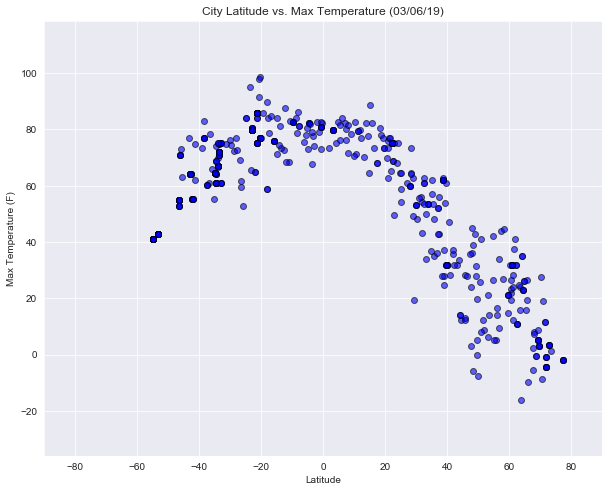

In [8]:
#Use the scatter function
#Draw Latitude vs Temperature Chart
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(CityWeather['Lat'], CityWeather['Max Temp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(CityWeather['Max Temp'])-20, max(CityWeather['Max Temp'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (03/06/19)")

# Save png images for each scatter plot.
plt.savefig("CityLat-MaxTemp-03.06.19.png")
plt.show()

## Humidity (%) vs. Latitude

C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


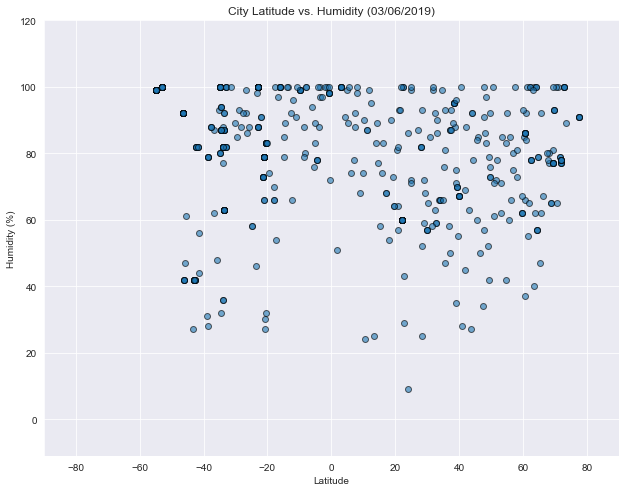

In [9]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Humidity', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Humidity (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Humidity'])-20, max(CityWeather['Humidity'])+20)))
plt.title("City Latitude vs. Humidity (03/06/2019)")

# Save png images for each scatter plot.
plt.savefig("CityLat-Humidity-03.06.19.png")
plt.show()

## Cloudiness (%) vs. Latitude

C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


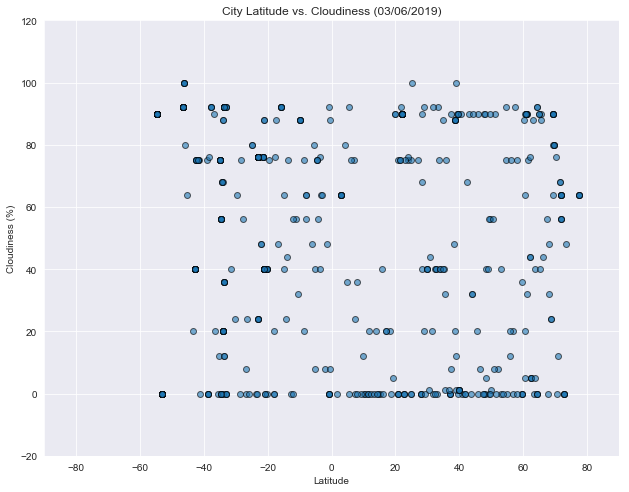

In [10]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Cloudiness', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Cloudiness (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Cloudiness'])-20, max(CityWeather['Cloudiness'])+20)))
plt.title("City Latitude vs. Cloudiness (03/06/2019)")

# Save png images for each scatter plot.
plt.savefig("CityLat-Cloudiness-03.06.19.png")
plt.show()

## Wind Speed (mph) vs. Latitude

C:\Users\sharo\Anaconda3\envs\PythonData\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


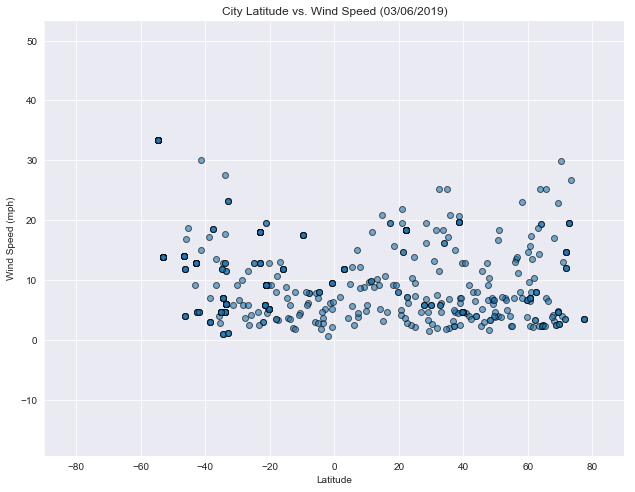

In [11]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Wind Speed', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Wind Speed (mph)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Wind Speed'])-20, max(CityWeather['Wind Speed'])+20)))
plt.title("City Latitude vs. Wind Speed (03/06/2019)")

# Save png images for each scatter plot.
plt.savefig("CityLat-WindSpeed-03.06.19.png")
plt.show()